### 1b. Load training and test set

In [1]:
import numpy as np
import pandas as pd
from imageio import imread
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

(540, 2500) (540,)


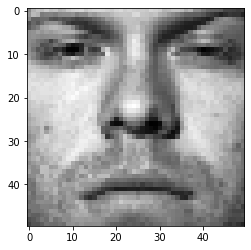

In [2]:
def read_img(path):
    yTrain, XTrain = [], []

    for line in open(path):
        im = imread(line.strip().split()[0])
        XTrain.append(im.reshape(2500,))
        yTrain.append(line.strip().split()[1])

    return np.array(XTrain, dtype=float), np.array(yTrain, dtype=int)

def plot_img(n, X):
    plt.imshow(X[n, :].reshape(50,50), cmap = cm.Greys_r)
    plt.show()

XTrain, yTrain = read_img('./faces/train.txt')
print(XTrain.shape, yTrain.shape)

plot_img(10, XTrain)

(100, 2500) (100,)


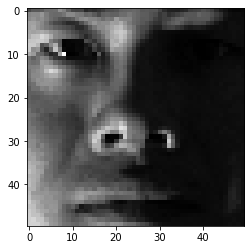

In [3]:
XTest, yTest = read_img('./faces/test.txt')
print(XTest.shape, yTest.shape)
plot_img(10, XTest)

### 1c. Average face

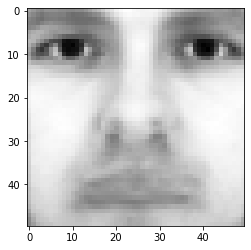

In [4]:
avgFace = np.mean(XTrain, axis=0)
plt.imshow(avgFace.reshape(50,50), cmap = cm.Greys_r)
plt.show()

### 1d. Mean substraction

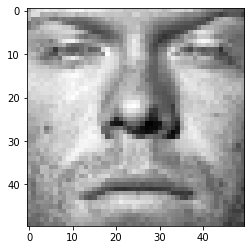

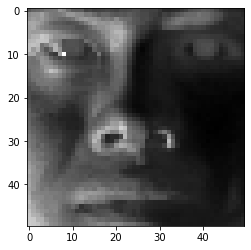

In [5]:
demeaned_XTrain = XTrain - avgFace
demeaned_XTest = XTest - avgFace
plot_img(10, demeaned_XTrain)
plot_img(10, demeaned_XTest)

### 1e. Eigenface

(2500, 2500)
(540, 540)


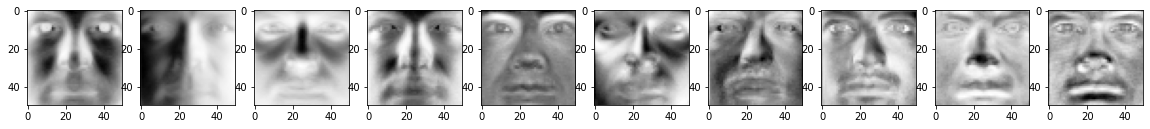

In [6]:
U, S, V = np.linalg.svd(demeaned_XTrain)
print(np.shape(V))
print(np.shape(U))

fig, axs = plt.subplots(1,10, figsize=(20,20))
axs = axs.ravel()

for i in range(10):
    axs[i].imshow(V[i, :].reshape(50,50), cmap = cm.Greys_r)

### 1f. Low-rank approximation

In [7]:
sigma = np.diag(S)
norms = []
ranks = np.arange(1,201,1)

In [8]:
for rank in ranks:
    r = rank
    approx_XTrain = U[:,:r].dot(sigma[:r,:r]).dot(V[:r,:])
    approx_error = approx_XTrain - demeaned_XTrain
    norm = np.linalg.norm(approx_error)
    norms.append(norm)

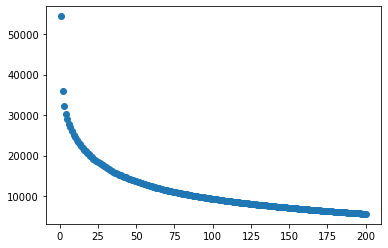

In [9]:
plt.scatter(ranks,norms);

### 1g. Eigenface feature

In [17]:
def generate_feature_matrix(X, V, r):
    return np.dot(X,np.transpose(V[:r,:]))

### 1h. Face recognition

In [34]:
FTrain = generate_feature_matrix(XTrain, V, 10)
FTest = generate_feature_matrix(XTest, V, 10)

logReg = LogisticRegressionCV(multi_class="ovr", n_jobs=-1)

logReg.fit(FTrain, yTrain)
yPredict = logReg.predict(FTest)

print("Accuracy: %s"%accuracy_score(yTest, yPredict))

Accuracy: 0.82


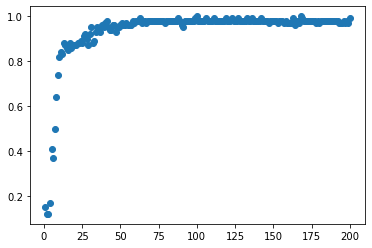

In [35]:
x = list(range(1,201))
y = []
for r in x:
    FTrain = generate_feature_matrix(XTrain, V, r)
    FTest = generate_feature_matrix(XTest, V, r)

    logReg = LogisticRegressionCV(multi_class="ovr", n_jobs=-1)

    logReg.fit(FTrain, yTrain)
    yPredict = logReg.predict(FTest)

    y.append(accuracy_score(yTest, yPredict))
    
plt.scatter(x,y)